In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
count = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        count += 1
        
        if count == 5:
            break
    if count == 5:
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paddy-disease-classification/sample_submission.csv
/kaggle/input/paddy-disease-classification/train.csv
/kaggle/input/paddy-disease-classification/train_images/tungro/109629.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/104765.jpg
/kaggle/input/paddy-disease-classification/train_images/tungro/109706.jpg


In [2]:
train_val_df = pd.read_csv('../input/paddy-disease-classification/train.csv')
train_val_df.head(), train_val_df.shape

(     image_id                  label variety  age
 0  100330.jpg  bacterial_leaf_blight   ADT45   45
 1  100365.jpg  bacterial_leaf_blight   ADT45   45
 2  100382.jpg  bacterial_leaf_blight   ADT45   45
 3  100632.jpg  bacterial_leaf_blight   ADT45   45
 4  101918.jpg  bacterial_leaf_blight   ADT45   45,
 (10407, 4))

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_val_df['label'].head()

0    bacterial_leaf_blight
1    bacterial_leaf_blight
2    bacterial_leaf_blight
3    bacterial_leaf_blight
4    bacterial_leaf_blight
Name: label, dtype: object

In [5]:
train_df, val_df = train_test_split(train_val_df, random_state= 42, stratify = train_val_df['label'])
len(train_df), len(val_df)

(7805, 2602)

In [6]:
train_df.head(), val_df.head()

(        image_id                  label         variety  age
 238   104430.jpg  bacterial_leaf_blight           ADT45   68
 9311  106152.jpg                 normal              RR   70
 7750  102422.jpg                 normal           ADT45   57
 7433  106739.jpg                  hispa        Onthanel   70
 2241  100909.jpg                  blast  KarnatakaPonni   75,
          image_id         label         variety  age
 7797   100082.jpg        normal           ADT45   60
 10198  102042.jpg        tungro           ADT45   72
 3340   100692.jpg    brown_spot           ADT45   70
 6652   105030.jpg         hispa           ADT45   70
 5834   106640.jpg  downy_mildew  KarnatakaPonni   70)

<AxesSubplot:>

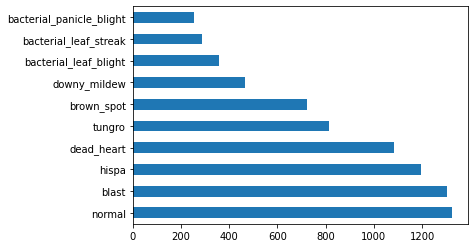

In [7]:
train_df['label'].value_counts().plot(kind='barh')

<AxesSubplot:>

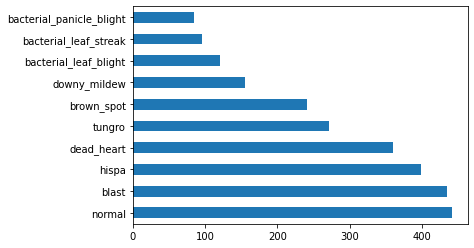

In [8]:
val_df['label'].value_counts().plot(kind='barh')

In [9]:
train_dir = 'Train'
val_dir = 'Val'
main_dir = '../input/paddy-disease-classification/train_images'
os.makedirs(train_dir, exist_ok = True)
os.makedirs(val_dir, exist_ok = True)

In [10]:
import shutil
from tqdm.notebook import tqdm

In [11]:
for i in tqdm(range(len(val_df))):
    img_name, label= val_df.iloc[i,0], val_df.iloc[i,1]
    src_file = os.path.join(main_dir, label, img_name)
    des_file = os.path.join(val_dir, label, img_name)
    
    assert os.path.exists(src_file), f"{img_name}"
    os.makedirs(os.path.join(val_dir, label), exist_ok = True)
    
    shutil.copy(src_file, des_file)    
    
    #break

  0%|          | 0/2602 [00:00<?, ?it/s]

In [12]:
!find Val -type f | wc -l

2602


In [13]:
for i in tqdm(range(len(train_df))):
    img_name, label= train_df.iloc[i,0], train_df.iloc[i,1]
    src_file = os.path.join(main_dir, label, img_name)
    des_file = os.path.join(train_dir, label, img_name)
    
    assert os.path.exists(src_file), f"{img_name}"
    os.makedirs(os.path.join(train_dir, label), exist_ok = True)
    
    shutil.copy(src_file, des_file)    
    
    #break

  0%|          | 0/7805 [00:00<?, ?it/s]

In [14]:
!find Train -type f | wc -l

7805
